<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/DL/Redes_e_hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = load_breast_cancer()
X, Y = data.data, data.target
Y = Y.reshape(1, -1)

# División en Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.T, test_size=0.2, random_state=42)

# Estandarización de Datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Red Neuronal Tensor Flow


Una Red Neuronal en TensorFlow es un modelo de aprendizaje profundo que utiliza un conjunto de algoritmos para aprender y realizar predicciones basadas en datos. Consiste en varias capas de nodos, donde cada nodo se conecta a otros nodos en las capas siguientes y anteriores. Los datos se introducen en la capa de entrada y, a medida que se procesa a través de la red, se genera una salida en la capa final. TensorFlow es una biblioteca de software de código abierto para el aprendizaje automático y la inteligencia artificial que se utiliza ampliamente para construir y entrenar redes neuronales.


In [ ]:
# mDefinimos la arquitectura del modelo como una secuencia de capas densas.
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, activation='sigmoid'),
tf.keras.layers.Dense(5, activation='sigmoid'),
tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compilamos el modelo, definiendo el optimizador, la función de pérdida y las métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ntrenamos el modelo con los datos de entrenamiento (X_train, Y_train), definimos el número de épocas, el tamaño del lote y el nivel de detalle de los mensajes de entrenamiento
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

# Evaluamos el modelo con los datos de prueba (X_test, Y_test), obteniendo la precisión en la predicción
_, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy:", test_accuracy)

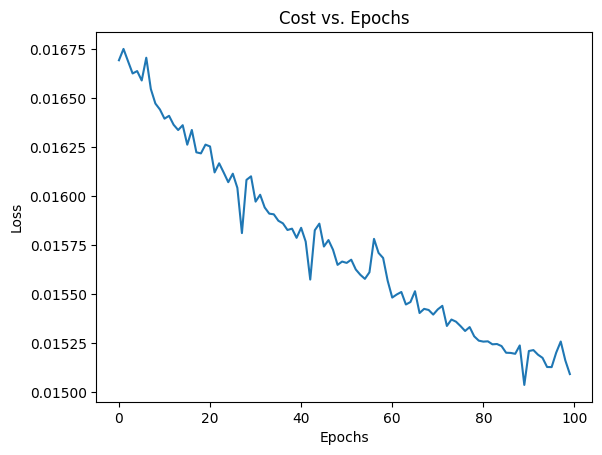

In [ ]:
# Entrenar el modelo y guardar información.
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)

# Plot the cost vs. epochs curve
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost vs. Epochs')
plt.show()


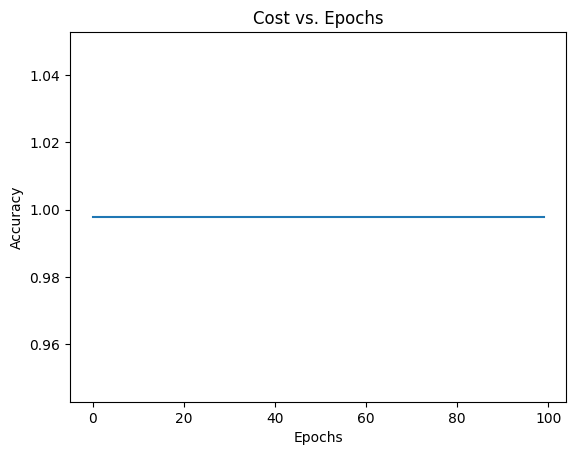

In [ ]:
# Plot the cost vs. epochs curve
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Cost vs. Epochs')
plt.show()

# Efecto de Hiperparámetros


Los hiperparámetros son parámetros que no son aprendidos por el modelo, sino que son elegidos por el programador antes de que comience el entrenamiento del modelo. Estos hiperparámetros pueden tener un gran impacto en el rendimiento del modelo.

En el código anterior, se establecen varios hiperparámetros para el modelo de red neuronal, como el número de neuronas en cada capa oculta, el tipo de función de activación utilizada y la tasa de aprendizaje del optimizador Adam. Estos hiperparámetros pueden ajustarse para optimizar el rendimiento del modelo.

En particular, el efecto de los hiperparámetros en el rendimiento del modelo puede ser monitoreado a través de la evaluación de la precisión y la pérdida del modelo. Al ajustar los hiperparámetros y monitorear los cambios en la precisión y la pérdida, se puede determinar cuál es la mejor configuración de hiperparámetros para el modelo en particular.

La función create_and_train_model toma como argumentos el tamaño de cada capa oculta, la tasa de aprendizaje, el número de épocas y el tamaño del lote.
Se crea un modelo secuencial de Keras utilizando tf.keras.Sequential().
Se agregan capas ocultas al modelo utilizando un bucle for que recorre la lista de tamaños de capa oculta proporcionada como argumento.
Se agrega una capa de salida al modelo que tiene una sola neurona y una función de activación sigmoidea.
Se compila el modelo utilizando el optimizador Adam, la función de pérdida de entropía cruzada binaria y las métricas de precisión.
El modelo se entrena utilizando los datos de entrenamiento proporcionados y se devuelve el modelo entrenado y la historia del entrenamiento (que contiene la precisión y la pérdida en cada época).

In [ ]:
def create_and_train_model(layer_sizes, learning_rate=0.01, epochs=100, batch_size=32):
    model = tf.keras.Sequential()

    # Input layer
  

    # Hidden layers
    for size in layer_sizes:
        model.add(tf.keras.layers.Dense(size, activation='sigmoid'))

    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile and train the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    return model, history

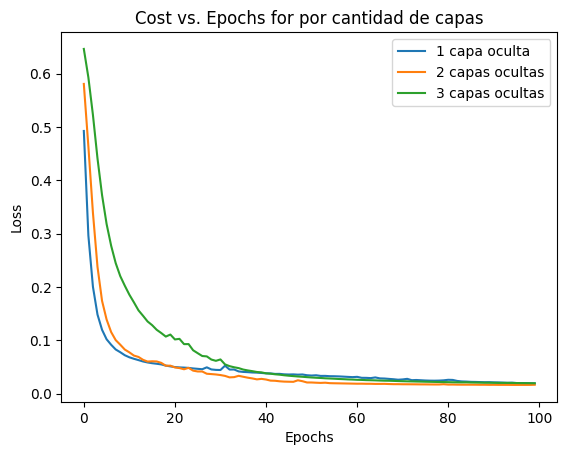

In [ ]:
# una capa oculta
model_1, history_1 = create_and_train_model([10])

# Dos capas ocultas
model_2, history_2 = create_and_train_model([10, 5])

# Tres capas ocultas
model_3, history_3 = create_and_train_model([10, 5, 3])

plt.plot(history_1.history['loss'], label='1 capa oculta')
plt.plot(history_2.history['loss'], label='2 capas ocultas')
plt.plot(history_3.history['loss'], label='3 capas ocultas')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost vs. Epochs for por cantidad de capas')
plt.legend()
plt.show()

# Diferentes cantidad de neuronas.


Este código crea dos modelos de redes neuronales con diferentes números de neuronas en la capa oculta: un modelo con solo 5 neuronas y otro con 20 neuronas. Luego entrena los modelos en los datos de entrenamiento y guarda los historiales de entrenamiento. Después, grafica las curvas de pérdida de los modelos para compararlos en términos de rendimiento. La gráfica muestra que el modelo con 20 neuronas logra una pérdida menor en general, mientras que el modelo con solo 5 neuronas tiene una pérdida más alta. Esto sugiere que el modelo con más neuronas tiene un mejor rendimiento en este problema específico.

In [ ]:
# Model with fewer neurons
model_few, history_few = create_and_train_model([5])

# Model with more neurons
model_more, history_more = create_and_train_model([20])

plt.plot(history_few.history['loss'], label='5 neurons')
plt.plot(history_2.history['loss'], label='10 neurons')
plt.plot(history_more.history['loss'], label='20 neurons')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost vs. Epochs for Different Numbers of Neurons')
plt.legend()
plt.show()


# Batchsize



En este código se están comparando los efectos de diferentes tamaños de lote (batch size) en el entrenamiento de modelos de redes neuronales. Primero se crea un modelo con un tamaño de lote pequeño (8) y otro con un tamaño de lote grande (64), ambos con dos capas ocultas de 10 y 5 neuronas y función de activación sigmoidal. Luego se entrena cada modelo con el conjunto de datos de entrenamiento y se registra el historial de pérdida (loss) en cada época. Finalmente, se grafican las curvas de pérdida de cada modelo en función del número de épocas, lo que permite comparar el efecto del tamaño del lote en el entrenamiento del modelo.

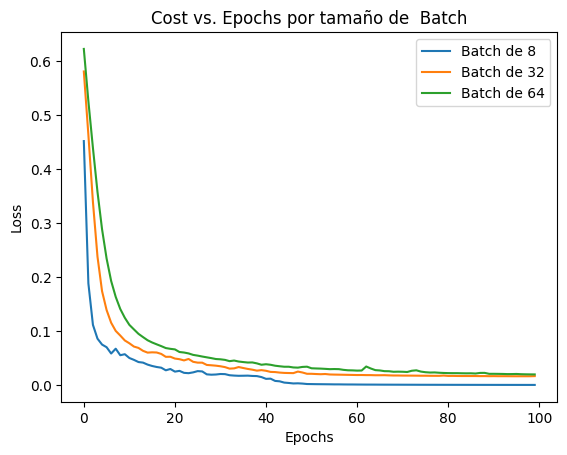

In [ ]:
# Model with smaller batch size
model_small, history_small = create_and_train_model([10, 5], batch_size=8)

# Model with larger batch size
model_large, history_large = create_and_train_model([10, 5], batch_size=64)

plt.plot(history_small.history['loss'], label='Batch de 8')
plt.plot(history_2.history['loss'], label='Batch de 32')
plt.plot(history_large.history['loss'], label='Batch de 64')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost vs. Epochs por tamaño de  Batch')
plt.legend()
plt.show()